# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | burnie
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | oume
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | faanui
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | shymkent
Processing Record 14 of Set 1 | yeppoon
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 22 of 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chokurdakh,70.6333,147.9167,-14.03,96,100,3.33,RU,1700009420
1,saint-philippe,-21.3585,55.7679,22.77,84,41,4.01,RE,1700009420
2,busselton,-33.6500,115.3333,20.60,56,42,7.44,AU,1700009421
3,qaanaaq,77.4840,-69.3632,-20.78,53,11,3.98,GL,1700009422
4,tuktoyaktuk,69.4541,-133.0374,-11.00,92,20,3.09,CA,1700009423


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chokurdakh,70.6333,147.9167,-14.03,96,100,3.33,RU,1700009420
1,saint-philippe,-21.3585,55.7679,22.77,84,41,4.01,RE,1700009420
2,busselton,-33.6500,115.3333,20.60,56,42,7.44,AU,1700009421
3,qaanaaq,77.4840,-69.3632,-20.78,53,11,3.98,GL,1700009422
4,tuktoyaktuk,69.4541,-133.0374,-11.00,92,20,3.09,CA,1700009423


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

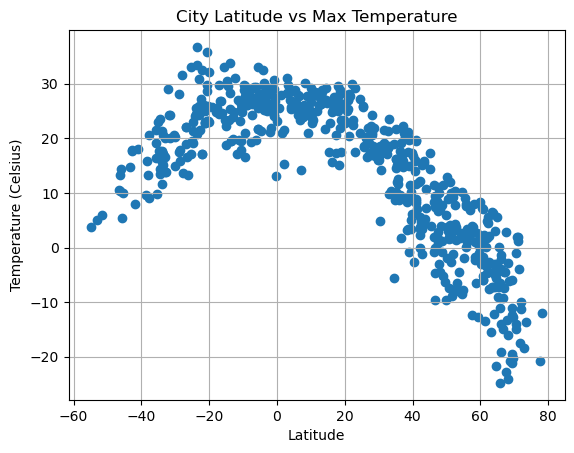

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1KNovak.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

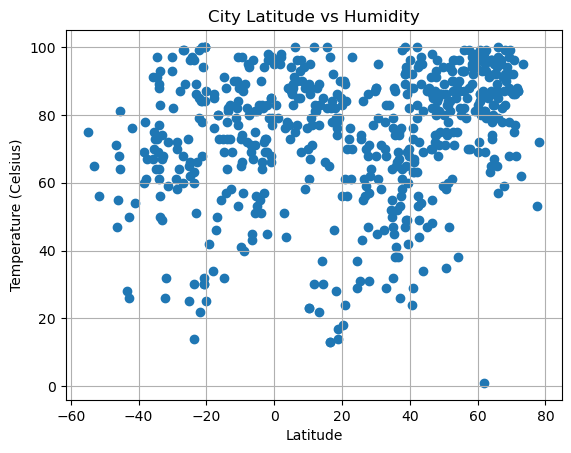

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2KNovak.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

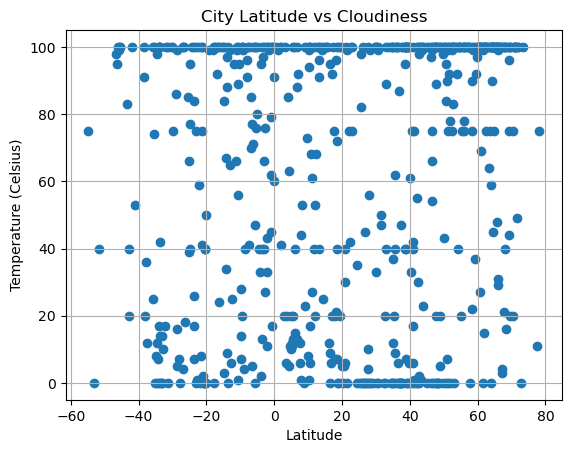

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3Knovak.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

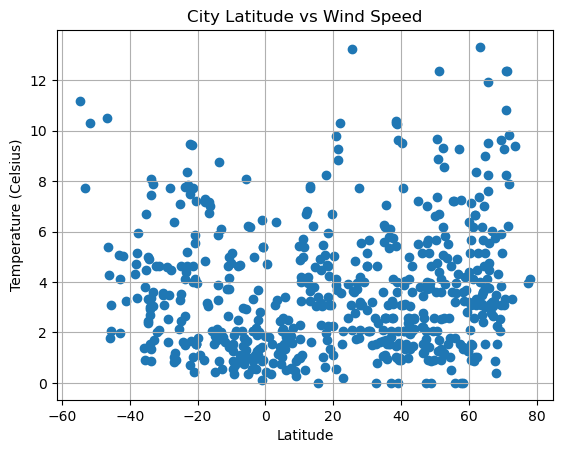

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4KNovak.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is:-0.7194201349596563


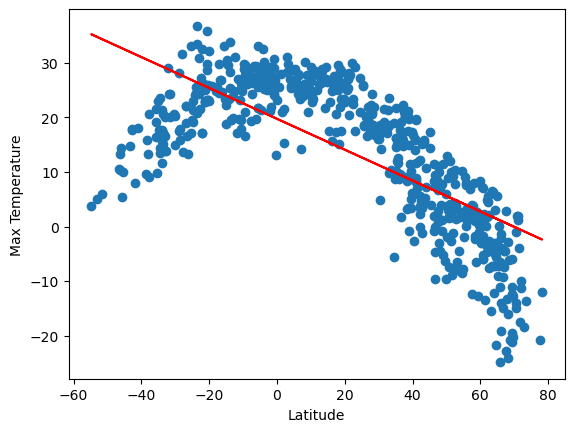

In [18]:
# Define a function to create Linear Regression plots, Latitude V.S. Max Temp
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,260),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chokurdakh,70.6333,147.9167,-14.03,96,100,3.33,RU,1700009420
3,qaanaaq,77.4840,-69.3632,-20.78,53,11,3.98,GL,1700009422
4,tuktoyaktuk,69.4541,-133.0374,-11.00,92,20,3.09,CA,1700009423
6,albany,42.6001,-73.9662,4.65,72,100,1.34,US,1700009214
8,oume,35.7839,139.2431,11.57,65,100,1.54,JP,1700009425


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saint-philippe,-21.3585,55.7679,22.77,84,41,4.01,RE,1700009420
2,busselton,-33.6500,115.3333,20.60,56,42,7.44,AU,1700009421
5,burnie,-41.0667,145.9167,18.03,54,53,3.25,AU,1700009423
7,cape town,-33.9258,18.4232,21.32,64,0,1.54,ZA,1700009424
10,faanui,-16.4833,-151.7500,26.80,80,100,7.18,PF,1700009426


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8906612091610536


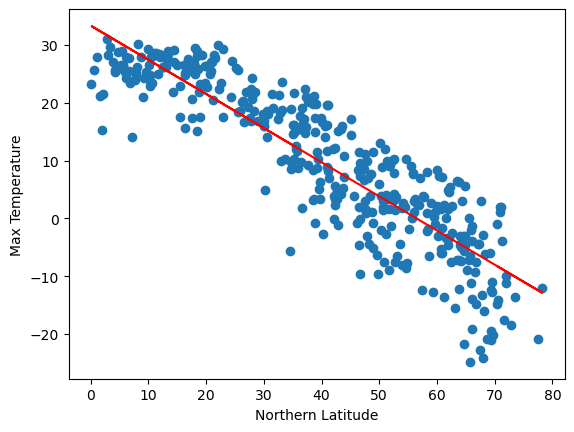

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.6695439550019469


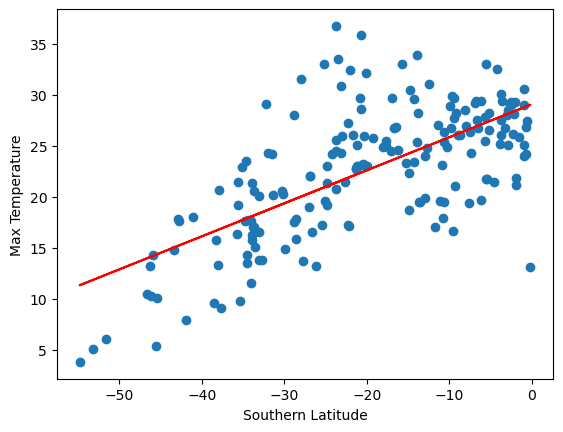

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,295),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** The r-value (0.89) for the Nothern Hemisphere gives a high indication that there is a strong correlation  between latitude and max temp. The Southern Hemisphere r-value of 0.66 suggests a moderate correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.22415170798053752


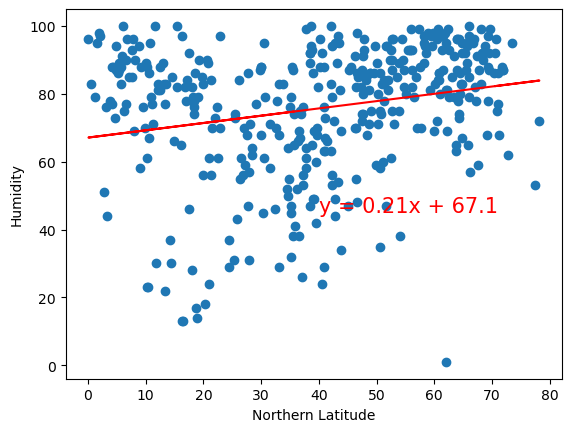

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.16579286493570483


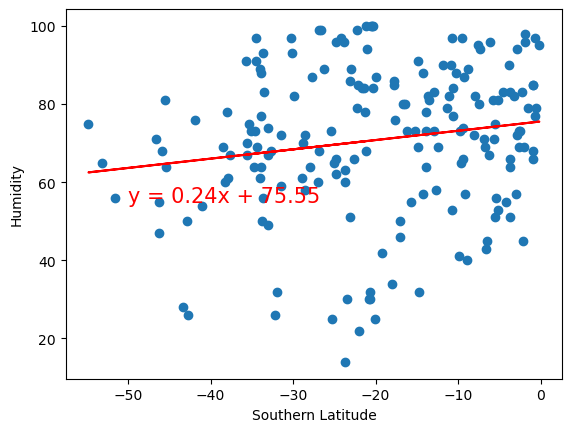

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** With the r-value (0.22) from the Northern Hemisphere shows a decent positvie correlation between latitude and humidity, whereas the r=value (0.16) from the Southern Hemisphere suggests a not so positive correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.26756195395125876


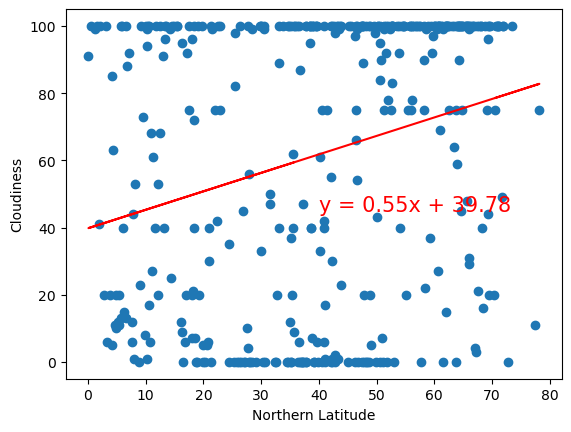

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.10513520926214787


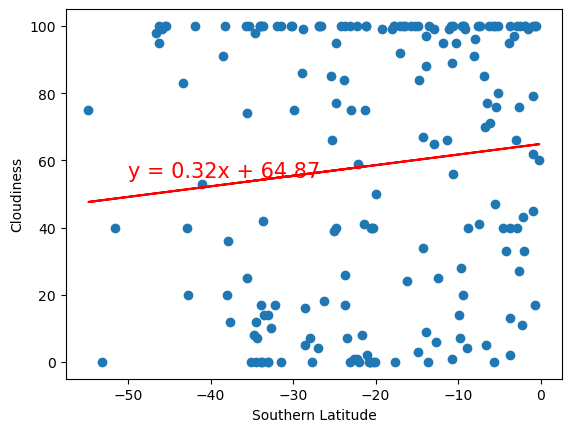

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** The Southern Hemisphere with an r-value of 0.105 has a decent positive correlation in terms of latitude and cloudiness, unlike the Northern Hemisphere with its r-value of 0.267 shows that the positive corrleation is not as strong.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.23501320682593166


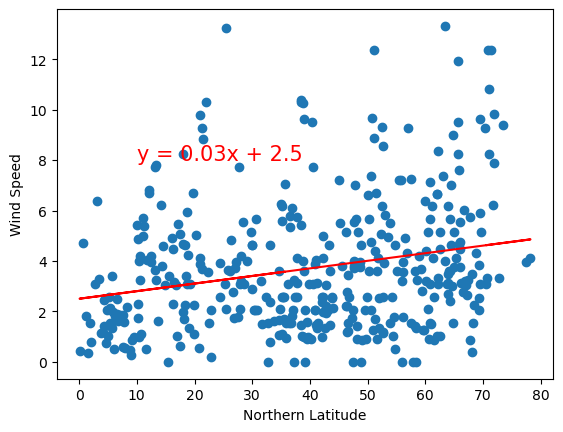

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.34320488186749026


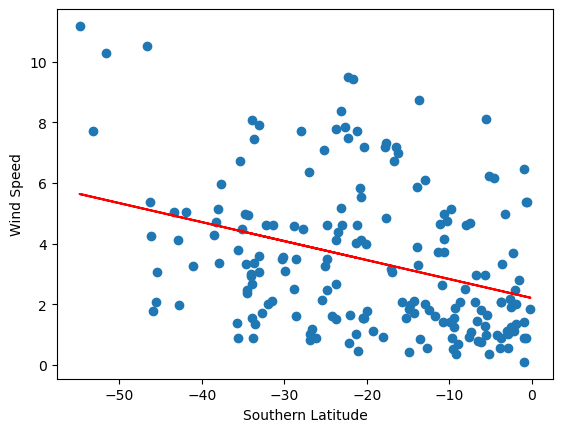

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** The Southern Hemisphere definitley shows a negative correlation with the r-value being -0.34. The Northern Hemisphere on the other hand shows a slight positive correlation with r-value being 0.23